In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import json
import pathlib
import matplotlib.pyplot as plt
import datetime as dt
import ipywidgets as widgets
from soilgasflux_fcs import synthetic_create

/Users/alexnaokiasatokobayashi/opt/anaconda3/envs/Peat/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(3154,)


/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/synthetic_create.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


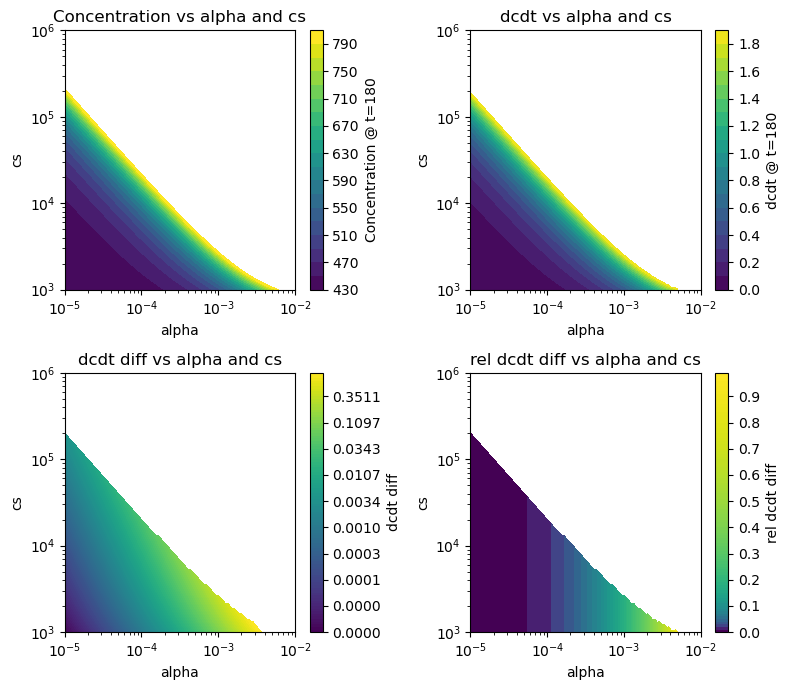

In [12]:
a = synthetic_create.Generator(total_time=180, c0=430)
a.alpha_cs_plot(alpha_min=1e-5, alpha_max=1e-2,
                cs_min=1e3, cs_max=1e6,
                n=100)

0.1
0.5
1.0


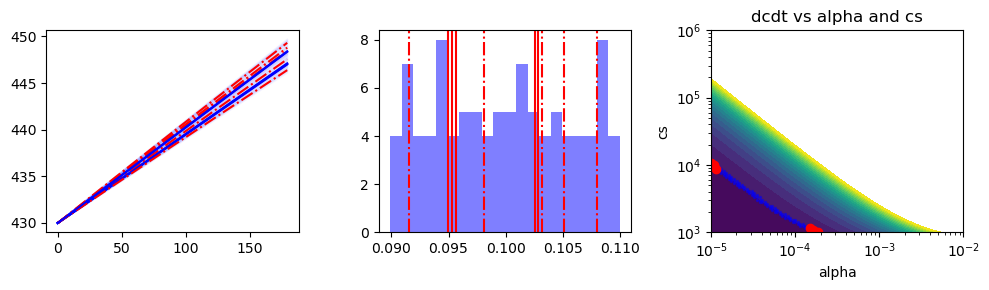

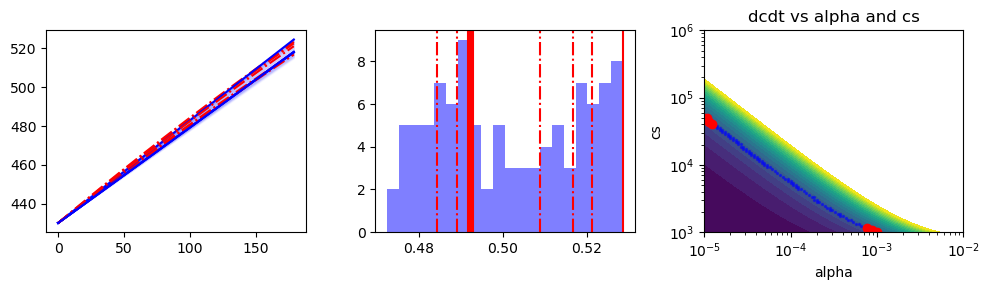

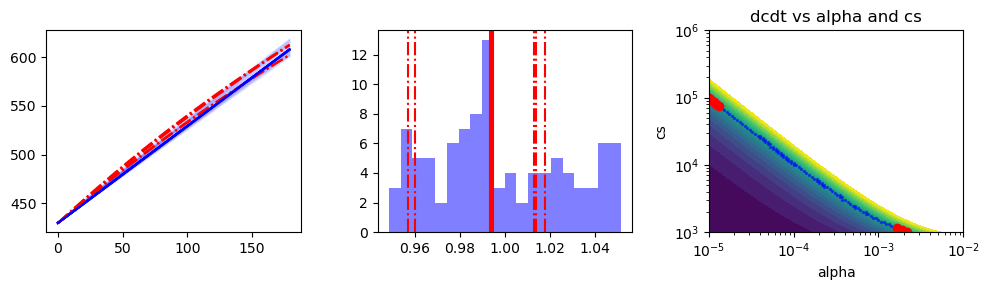

In [14]:
for dcdt in [0.1, 0.5, 1.0]:
    print(dcdt)
    a.cc_curve_plot(selected_dcdt=dcdt)

In [15]:
# a.create_selected(add_noise=False, noise_intensity=0, noise_type='exp',
#                   save_path='/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/')

2025-05-08 15:22:56.664973 2025-05-08 15:25:56.664973
File 2025-5-8_15-22-56.json saved
2025-05-08 15:25:56.664973 2025-05-08 15:28:56.664973
File 2025-5-8_15-25-56.json saved
2025-05-08 15:28:56.664973 2025-05-08 15:31:56.664973
File 2025-5-8_15-28-56.json saved
2025-05-08 15:31:56.664973 2025-05-08 15:34:56.664973
File 2025-5-8_15-31-56.json saved
2025-05-08 15:34:56.664973 2025-05-08 15:37:56.664973
File 2025-5-8_15-34-56.json saved
2025-05-08 15:37:56.664973 2025-05-08 15:40:56.664973
File 2025-5-8_15-37-56.json saved
2025-05-08 15:40:56.664973 2025-05-08 15:43:56.664973
File 2025-5-8_15-40-56.json saved
2025-05-08 15:43:56.664973 2025-05-08 15:46:56.664973
File 2025-5-8_15-43-56.json saved
2025-05-08 15:46:56.664973 2025-05-08 15:49:56.664973
File 2025-5-8_15-46-56.json saved
2025-05-08 15:49:56.664973 2025-05-08 15:52:56.664973
File 2025-5-8_15-49-56.json saved
2025-05-08 15:52:56.664973 2025-05-08 15:55:56.664973
File 2025-5-8_15-52-56.json saved
2025-05-08 15:55:56.664973 2025-

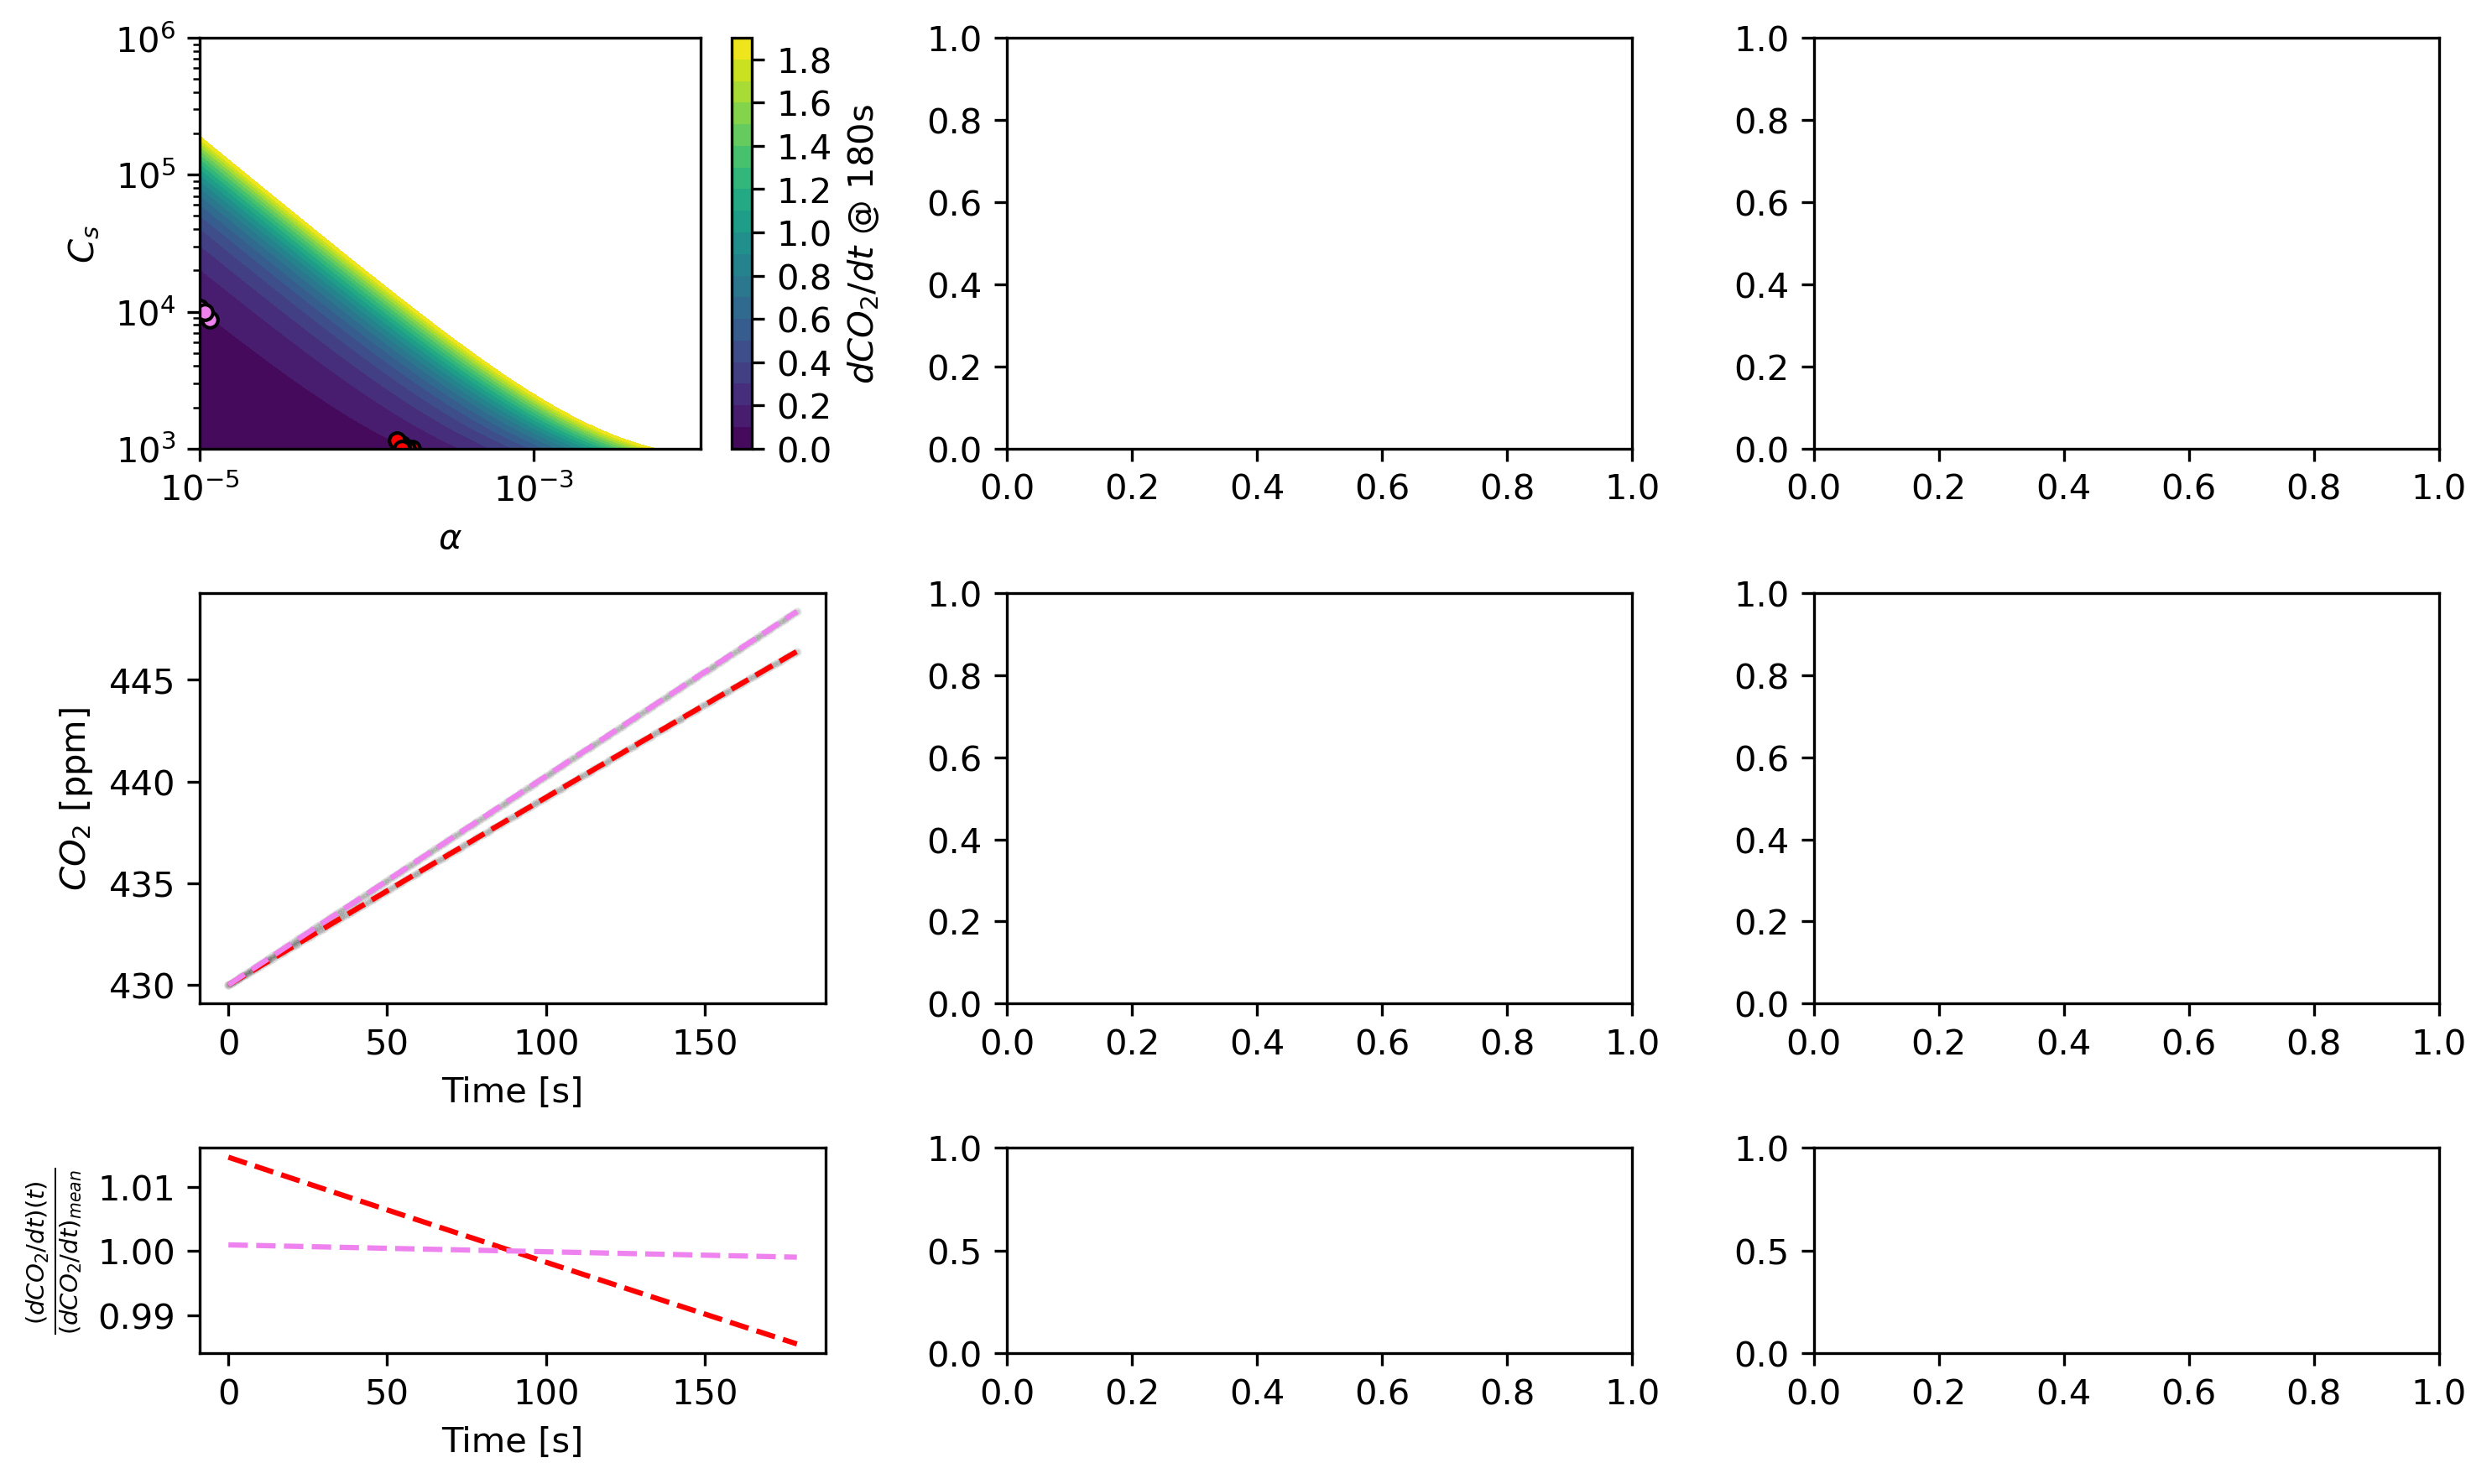

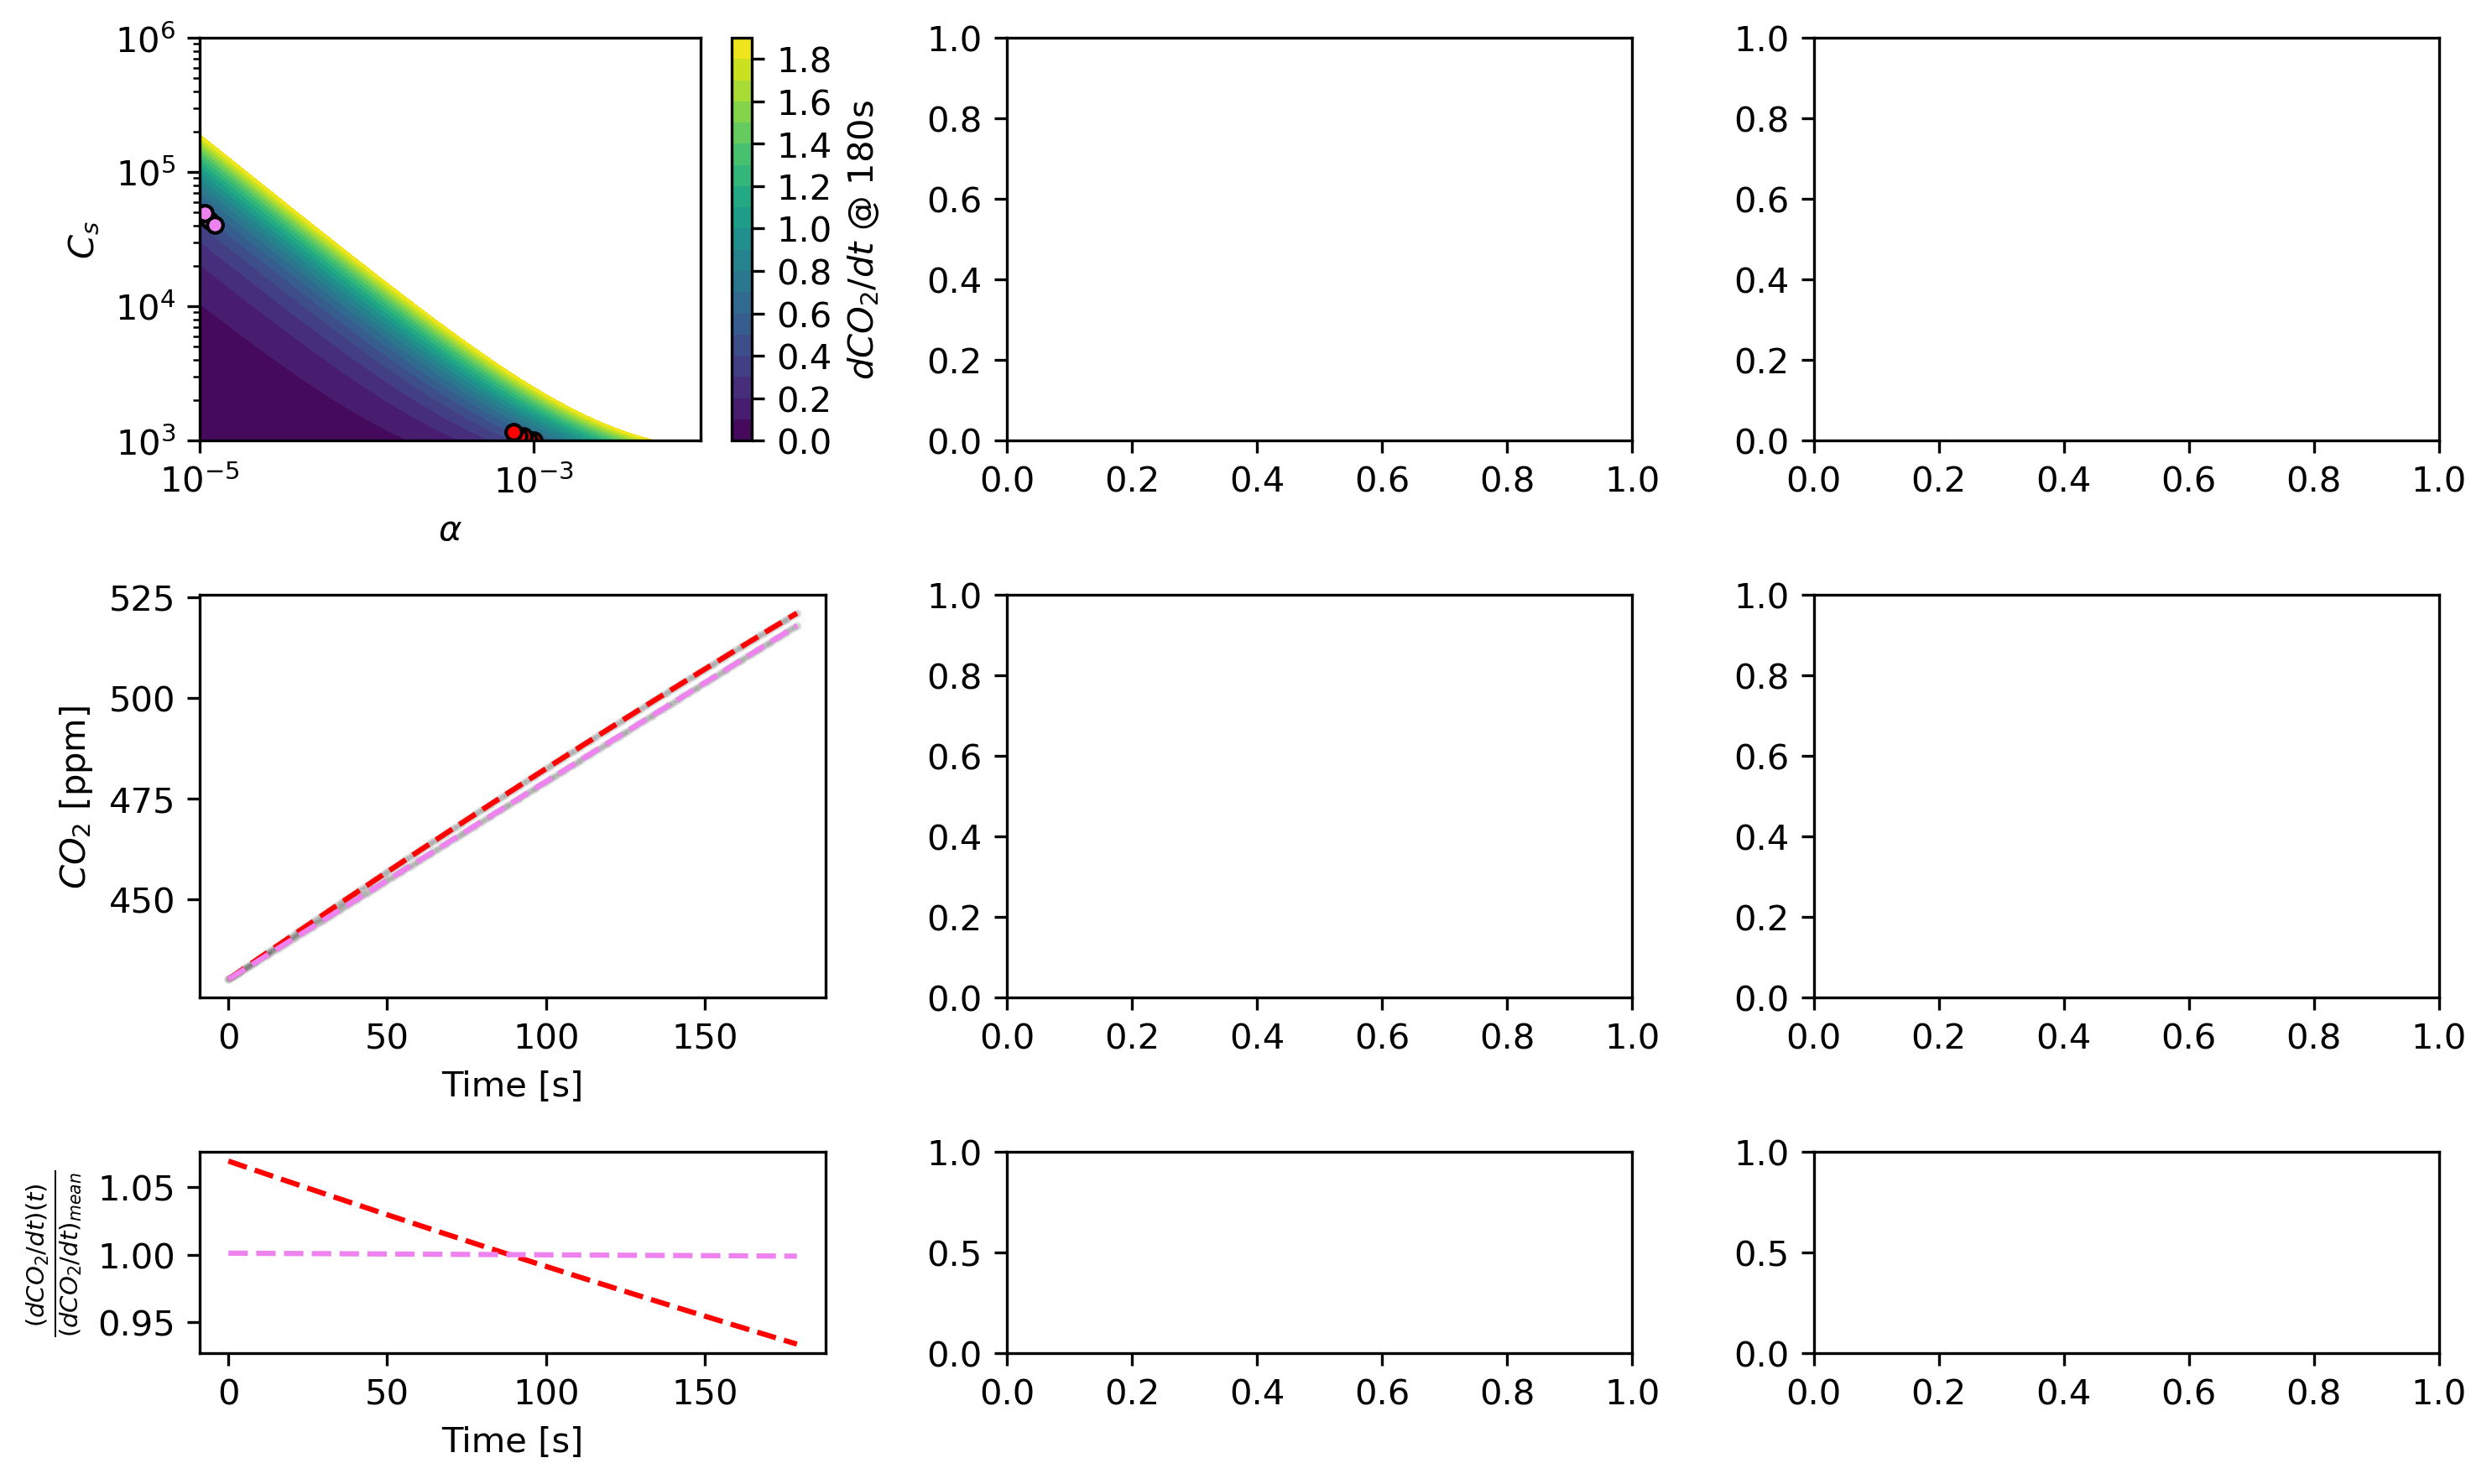

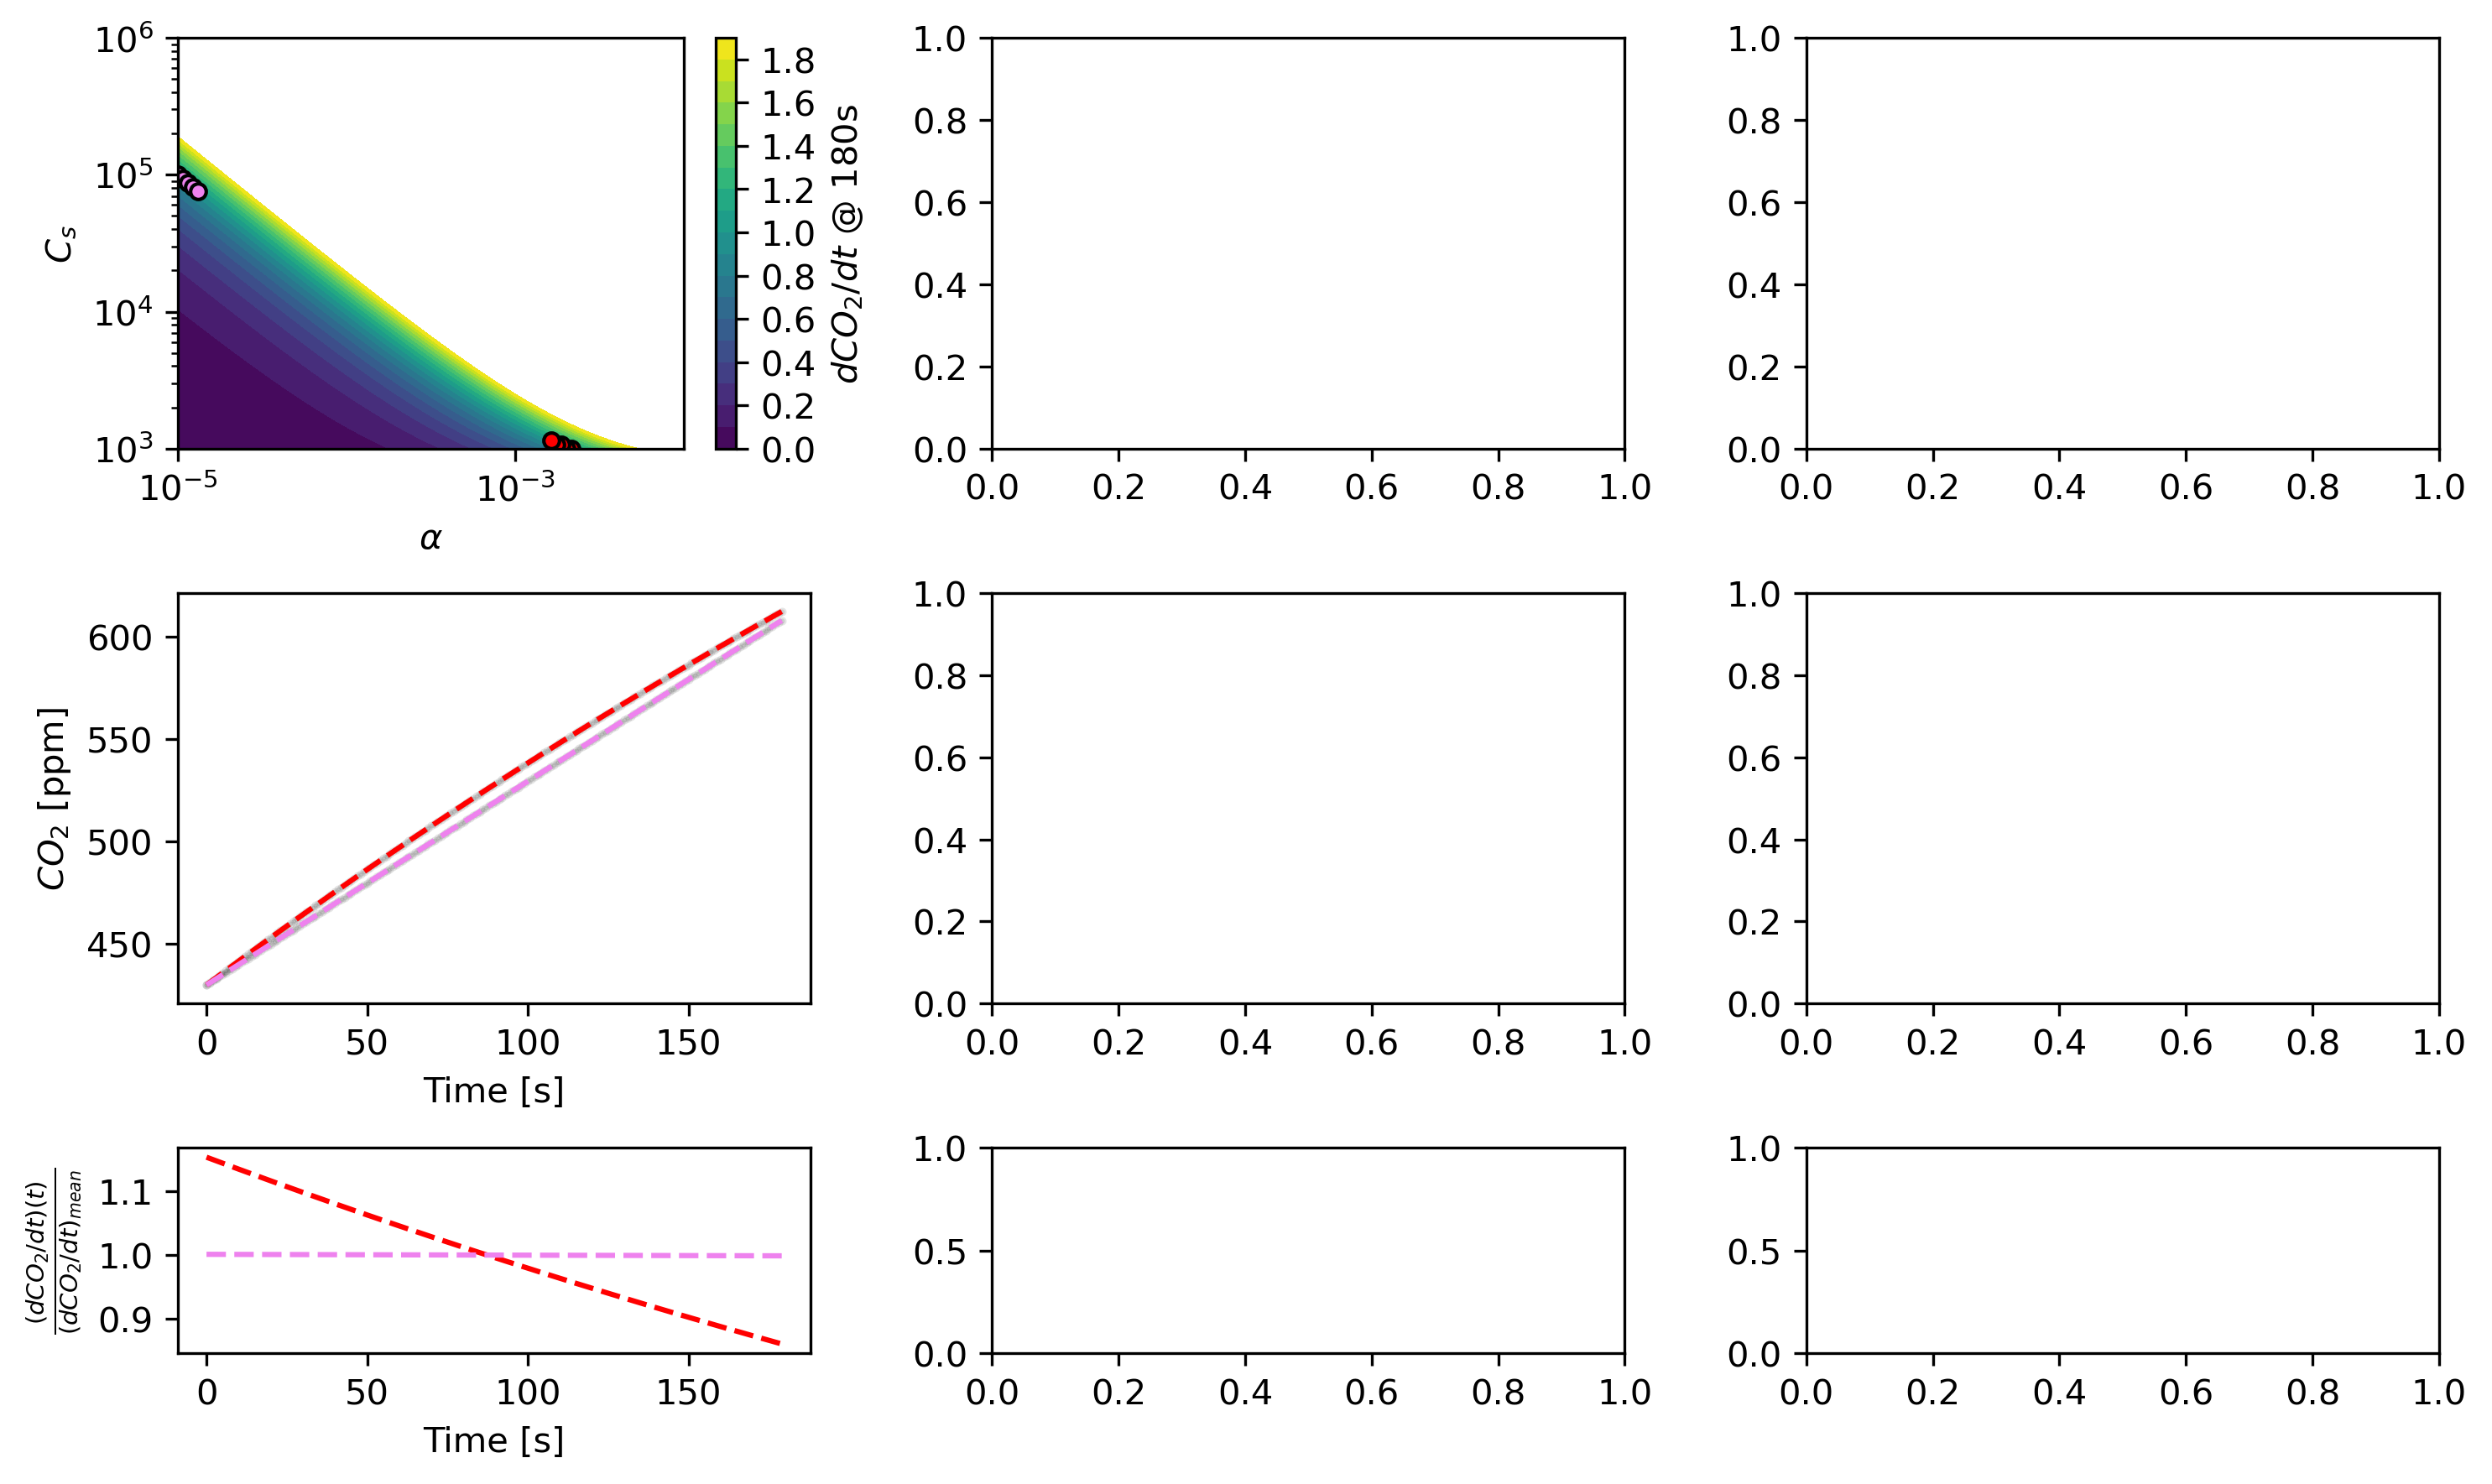

In [10]:
for dcdt in [0.1, 0.5, 1.0]:
    a.cc_curve_plot2(list_selected_dcdt=[dcdt])

In [17]:
from soilgasflux_fcs import simulate_sensor

In [47]:
total_time = 120
sim = simulate_sensor.Simulate_Sensor(alpha=1e-4, cs=1e4, c0=430, t0=0, total_time=total_time,dt=1)

# sim.sim_ideal_curve()

In [55]:
sim.chamber_settings(area=np.pi*20**2/4, chamber_volume=np.pi*20**2/4*20)
sim.internal_pump_settings(pump_volume=1, pump_rate=250)
sim.additional_settings(volume=20)
sim.gasAnalyzer_settings(response_time=10, 
                         gasAnalyzer_volume=30, 
                         sensor_accuracy=0.1, sensor_precision=0.5)

Chamber settings: area=314.159 cm2, volume=6283.185 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=10.000 s, volume=30.000 cm3, accuracy=0.100 ppm, precision=0.500 ppm


In [57]:
final = sim.run_simulation(source_ppm=np.ones(total_time)*1, 
                   with_diffusion=True, 
                   with_advection=True, 
                   verbose=False)

In [52]:
final

array([430.08626476, 429.23776889, 430.38147728, 430.63445074,
       431.7582563 , 432.10227056, 433.14923389, 434.51128706,
       435.33631349, 436.47365302, 436.44155177, 437.7382341 ,
       440.04606345, 440.35877501, 440.69273002, 441.64771997,
       443.47896374, 443.49094652, 444.8558515 , 445.46439892,
       447.42610765, 448.6468852 , 449.61611616, 450.24967723,
       451.12784093, 452.30835144, 453.75845777, 454.73408966,
       455.02250246, 457.21637151, 457.54770806, 457.68173241,
       459.61922894, 460.8062375 , 461.23513934, 462.66868922,
       463.53341563, 464.59573842, 465.24662399, 465.48869957,
       466.37215335, 468.2864925 , 469.32408818, 469.92968801,
       471.45714606, 472.27382701, 473.73966186, 474.62460758,
       474.67469536, 475.83159318, 477.54521639, 478.29529157,
       479.24220299, 480.36567238, 481.54030009, 482.74680373,
       483.73763776, 484.47748836, 485.80553017, 485.73666262,
       486.93400154, 487.99482555, 489.79658144, 490.74

In [63]:
files_folder = r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/'
folder_toSave = r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test06/'
for file in pathlib.Path(files_folder).glob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    print(file)
    concentration_ppm = data['raw_data']['k30_co2']
    source_ppm = np.diff(np.array(concentration_ppm))


    total_time = len(data['raw_data']['k30_co2'])
    sim = simulate_sensor.Simulate_Sensor(alpha=1e-4, 
                                          cs=1e4, c0=430, t0=0, 
                                          total_time=total_time,
                                          dt=1)
    sim.chamber_settings(area=np.pi*20**2/4, chamber_volume=np.pi*20**2/4*20)
    sim.internal_pump_settings(pump_volume=1, pump_rate=250)
    sim.additional_settings(volume=20)
    sim.gasAnalyzer_settings(response_time=1, 
                            gasAnalyzer_volume=30, 
                            sensor_accuracy=0.1, sensor_precision=0.5)
    final = sim.run_simulation(source_ppm=source_ppm, 
                   with_diffusion=True, 
                   with_advection=True, 
                   verbose=False)
    data['raw_data']['k30_co2'] = list(final)

    with open(folder_toSave + file.name, 'w') as f:
        json.dump(data, f)


/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/2025-5-8_15-52-56.json
Chamber settings: area=314.159 cm2, volume=6283.185 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=1.000 s, volume=30.000 cm3, accuracy=0.100 ppm, precision=0.500 ppm
/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/2025-5-8_16-13-56.json
Chamber settings: area=314.159 cm2, volume=6283.185 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=1.000 s, volume=30.000 cm3, accuracy=0.100 ppm, precision=0.500 ppm
/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/2025-5-8_16-25-56.json
Chamber settings: area=314.159 cm2, volume=6283.185 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=1.000 s, volume=30.00

In [64]:
files_folder = r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/'
folder_toSave = r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test07/'
for file in pathlib.Path(files_folder).glob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    print(file)
    concentration_ppm = data['raw_data']['k30_co2']
    source_ppm = np.diff(np.array(concentration_ppm))


    total_time = len(data['raw_data']['k30_co2'])
    sim = simulate_sensor.Simulate_Sensor(alpha=1e-4, 
                                          cs=1e4, c0=430, t0=0, 
                                          total_time=total_time,
                                          dt=1)
    sim.chamber_settings(area=np.pi*20**2/4, chamber_volume=np.pi*20**2/4*20)
    sim.internal_pump_settings(pump_volume=1, pump_rate=250)
    sim.additional_settings(volume=20)
    sim.gasAnalyzer_settings(response_time=20, 
                            gasAnalyzer_volume=30, 
                            sensor_accuracy=0.1, sensor_precision=1.5)
    final = sim.run_simulation(source_ppm=source_ppm, 
                   with_diffusion=True, 
                   with_advection=True, 
                   verbose=False)
    data['raw_data']['k30_co2'] = list(final)

    with open(folder_toSave + file.name, 'w') as f:
        json.dump(data, f)


/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/2025-5-8_15-52-56.json
Chamber settings: area=314.159 cm2, volume=6283.185 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=20.000 s, volume=30.000 cm3, accuracy=0.100 ppm, precision=1.500 ppm
/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/2025-5-8_16-13-56.json
Chamber settings: area=314.159 cm2, volume=6283.185 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=20.000 s, volume=30.000 cm3, accuracy=0.100 ppm, precision=1.500 ppm
/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/2025-5-8_16-25-56.json
Chamber settings: area=314.159 cm2, volume=6283.185 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=20.000 s, volume=30

In [68]:
folder_base = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/')
folder_Commercial = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test06/')
folder_LowCost = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test07/')

In [77]:
df_base = pd.DataFrame()
for file in folder_base.rglob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['raw_data'])
    df['id'] = file.name
    df['alpha'] = data['config']['alpha']
    df['cs'] = data['config']['c_s']
    df['c0'] = data['config']['c_c0']
    df['t0'] = data['config']['t0']
    df['curvature'] = data['config']['curvature']  
    df_base = pd.concat([df_base, df], axis=0)

df_commercial = pd.DataFrame()
for file in folder_Commercial.rglob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['raw_data'])
    df['id'] = file.name
    df['alpha'] = data['config']['alpha']
    df['cs'] = data['config']['c_s']
    df['c0'] = data['config']['c_c0']
    df['t0'] = data['config']['t0']
    df['curvature'] = data['config']['curvature']
    df_commercial = pd.concat([df_commercial, df], axis=0)

df_lowcost = pd.DataFrame()
for file in folder_LowCost.rglob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['raw_data'])
    df['id'] = file.name
    df['alpha'] = data['config']['alpha']
    df['cs'] = data['config']['c_s']
    df['c0'] = data['config']['c_c0']
    df['t0'] = data['config']['t0']
    df['curvature'] = data['config']['curvature']
    df_lowcost = pd.concat([df_lowcost, df], axis=0)

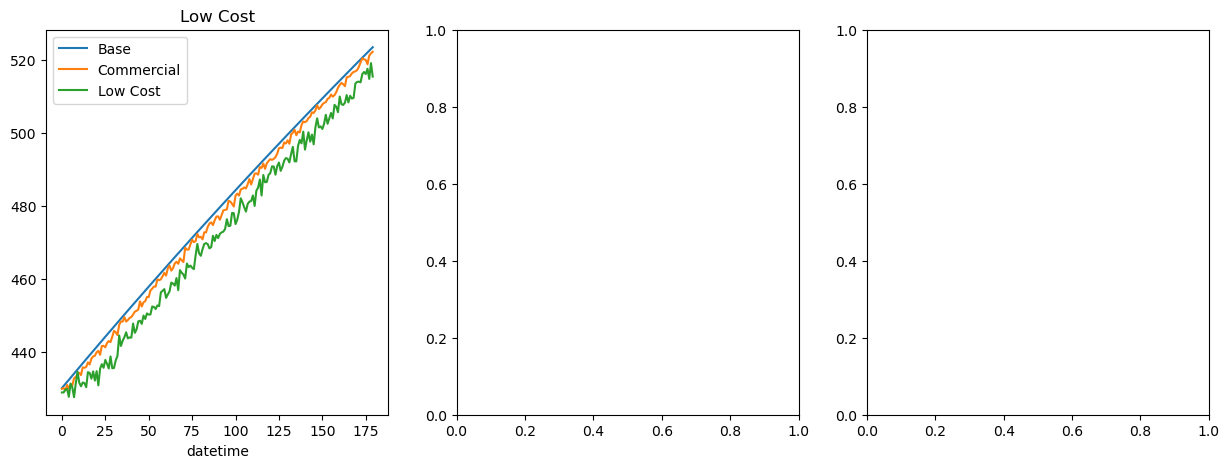

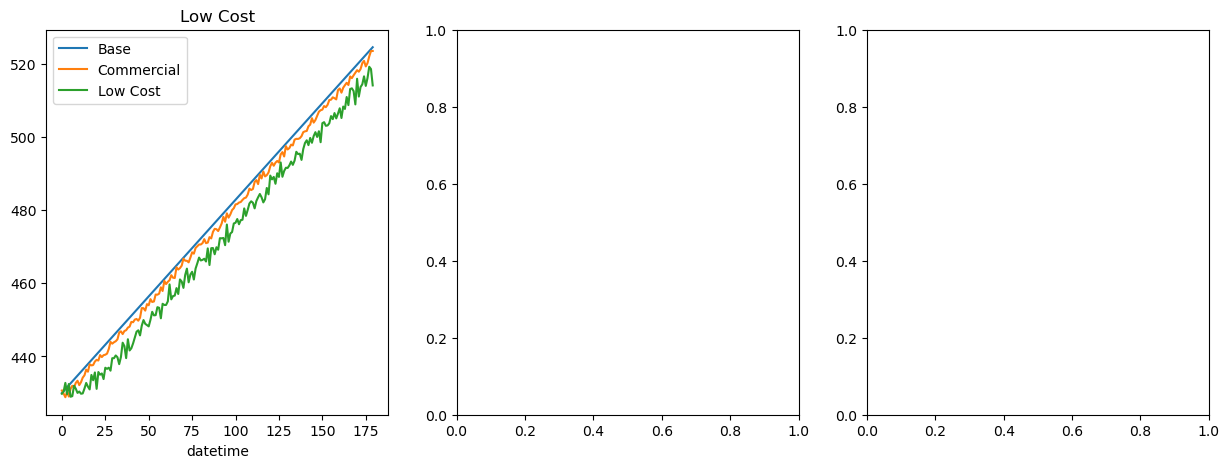

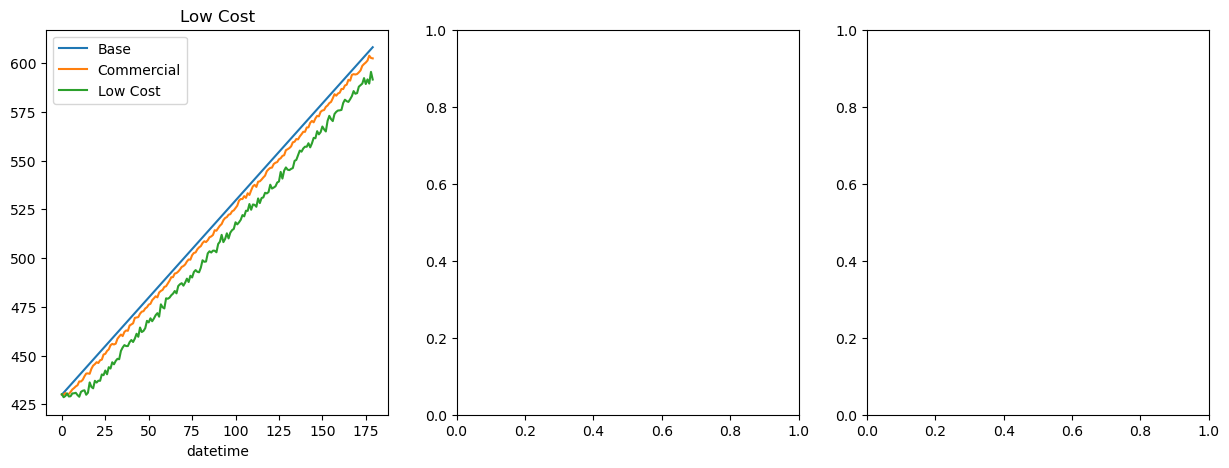

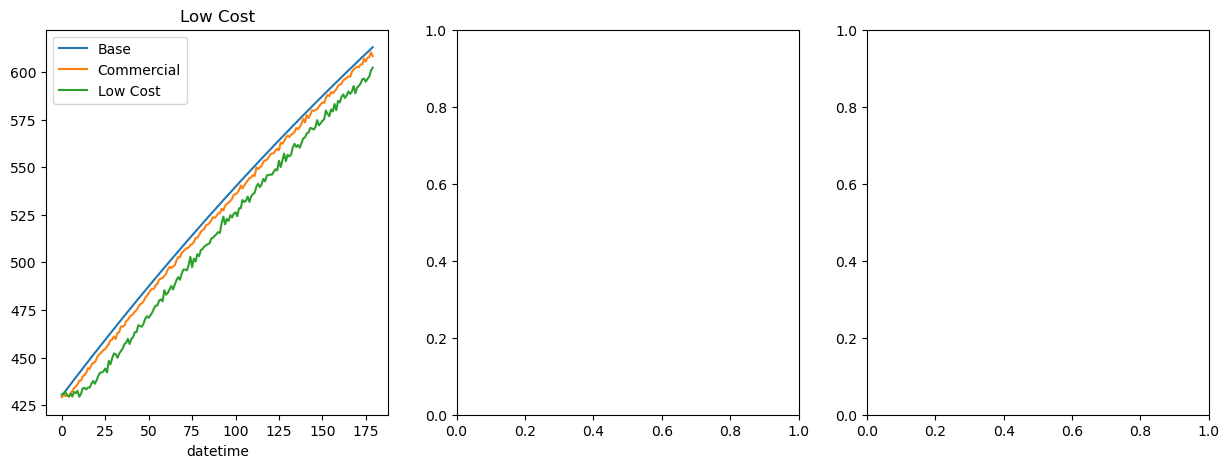

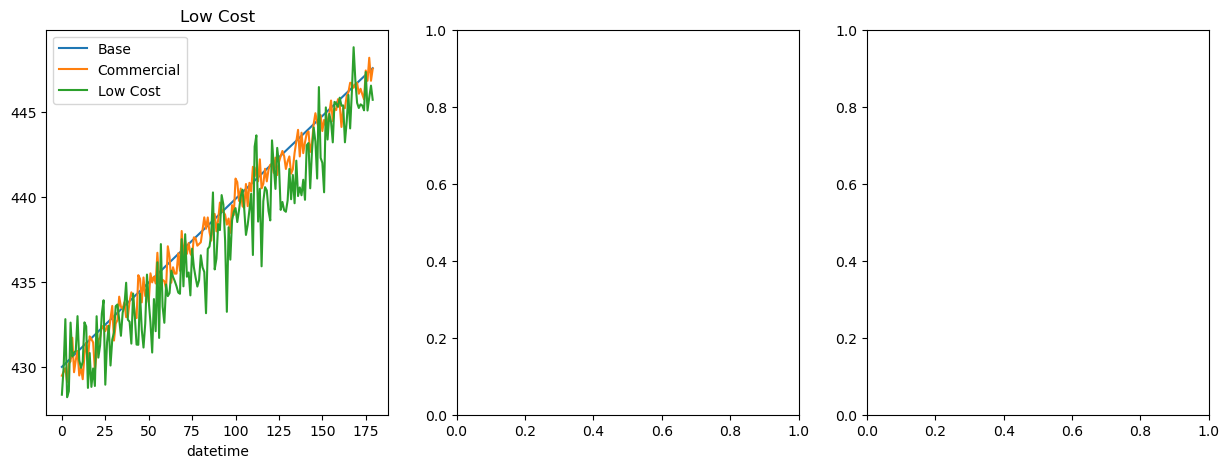

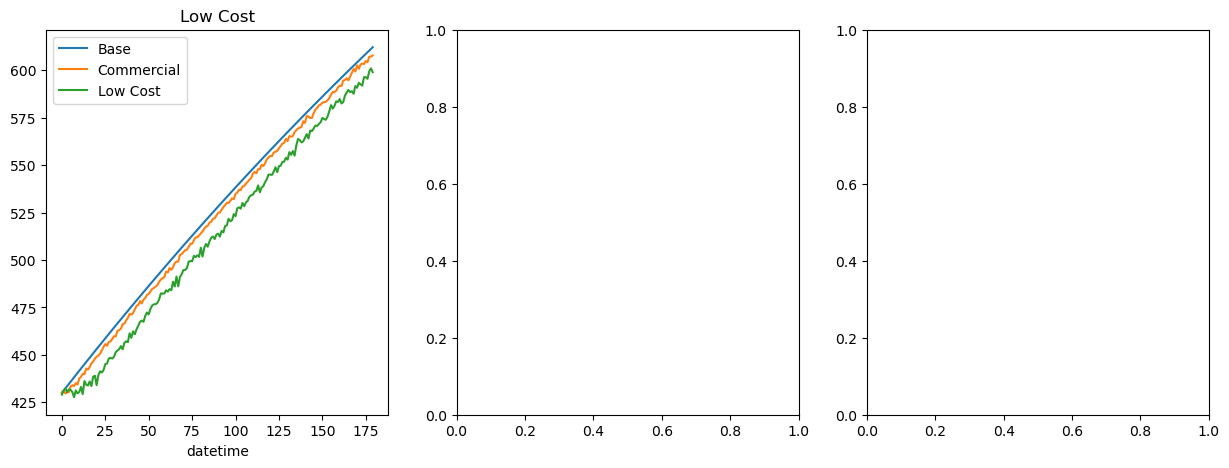

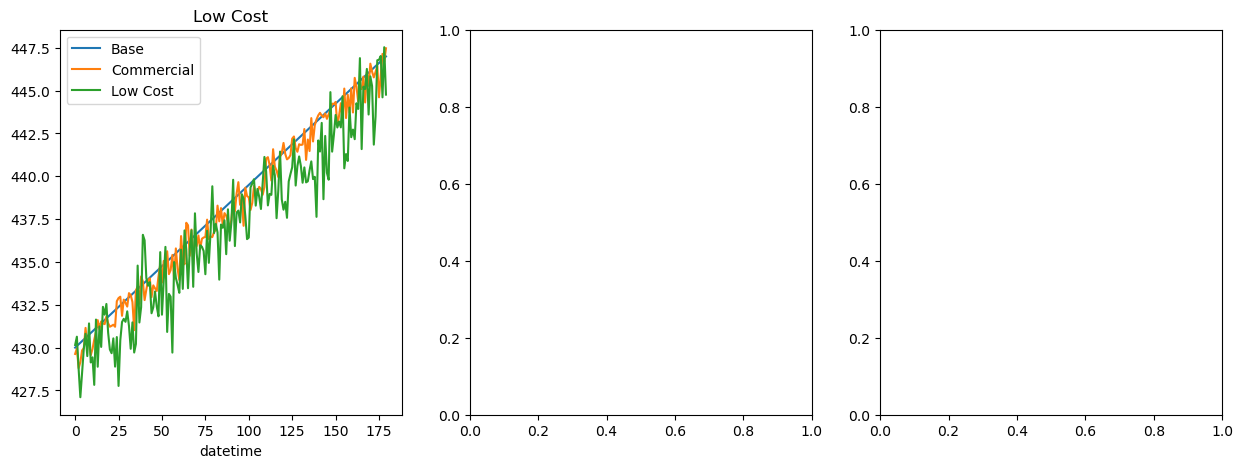

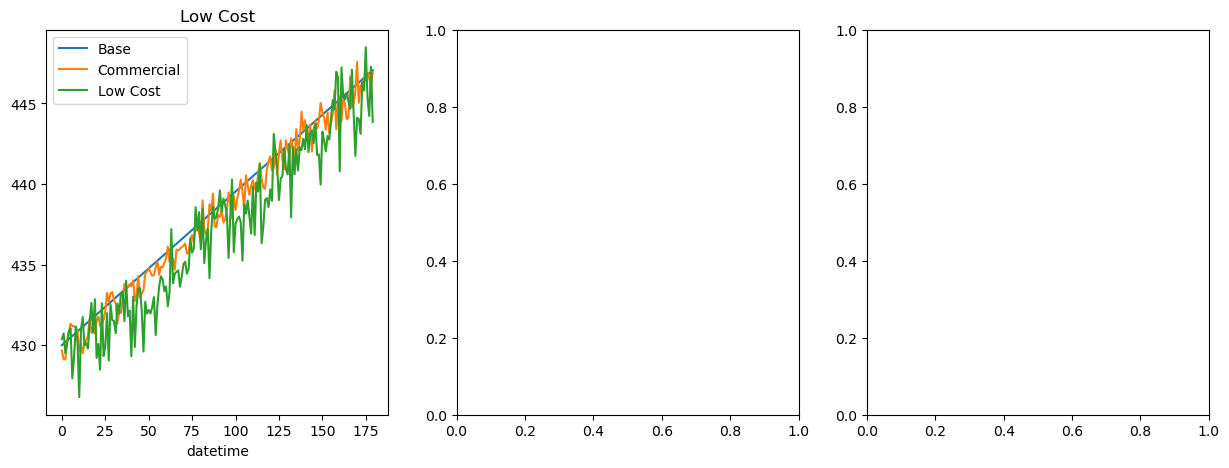

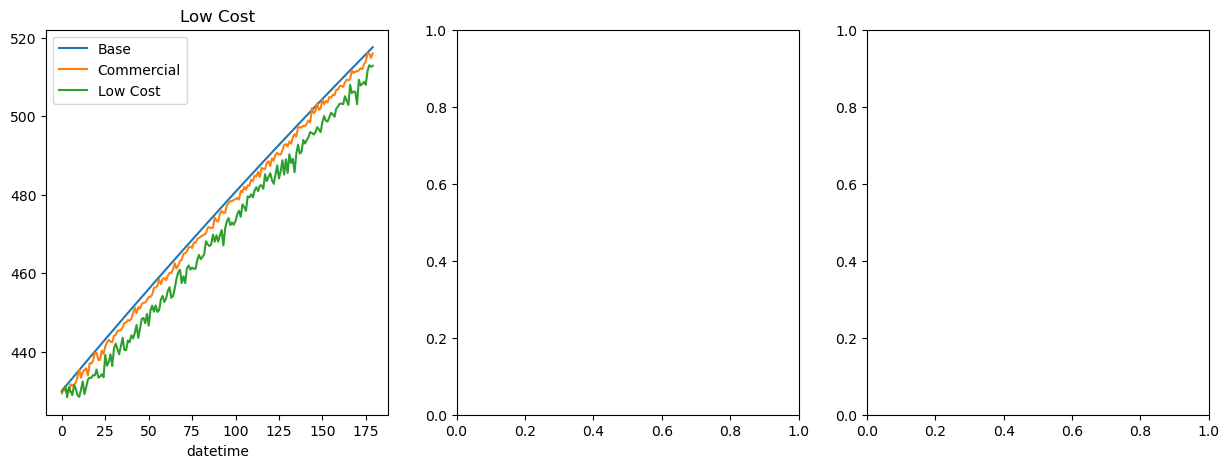

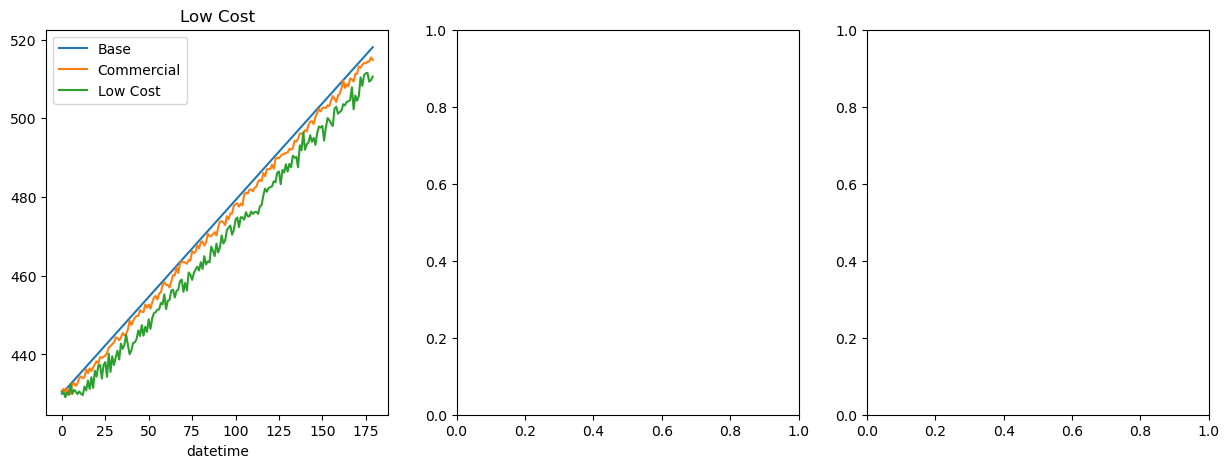

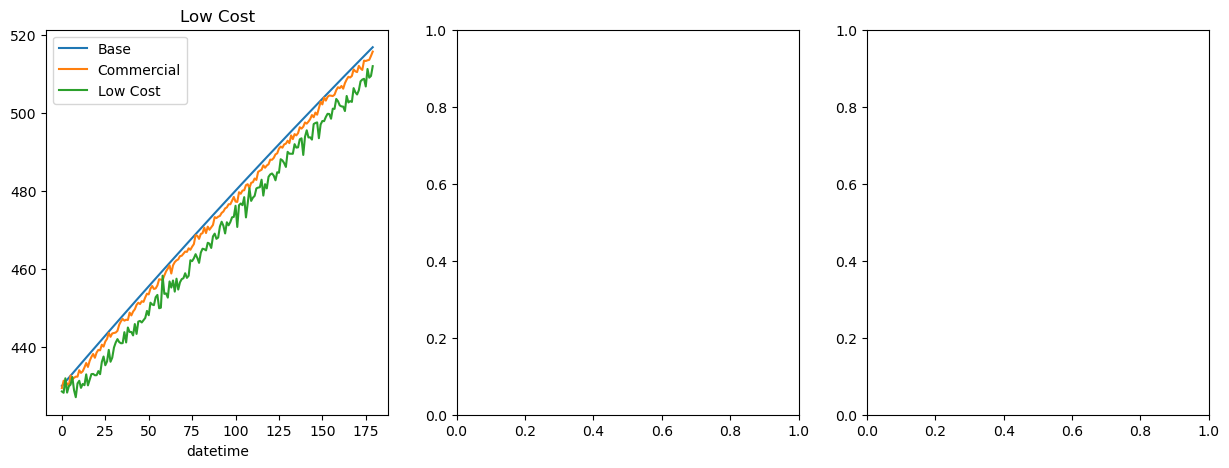

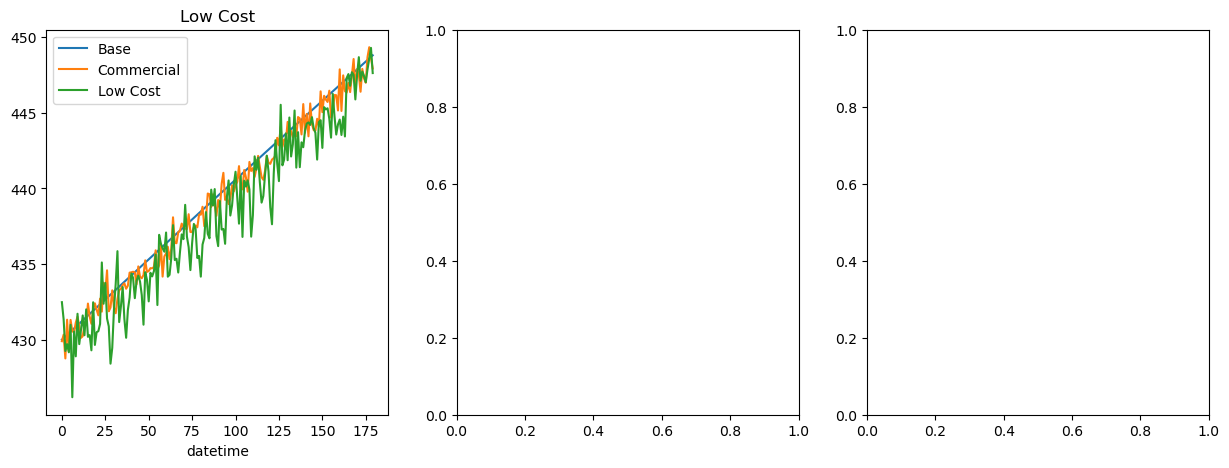

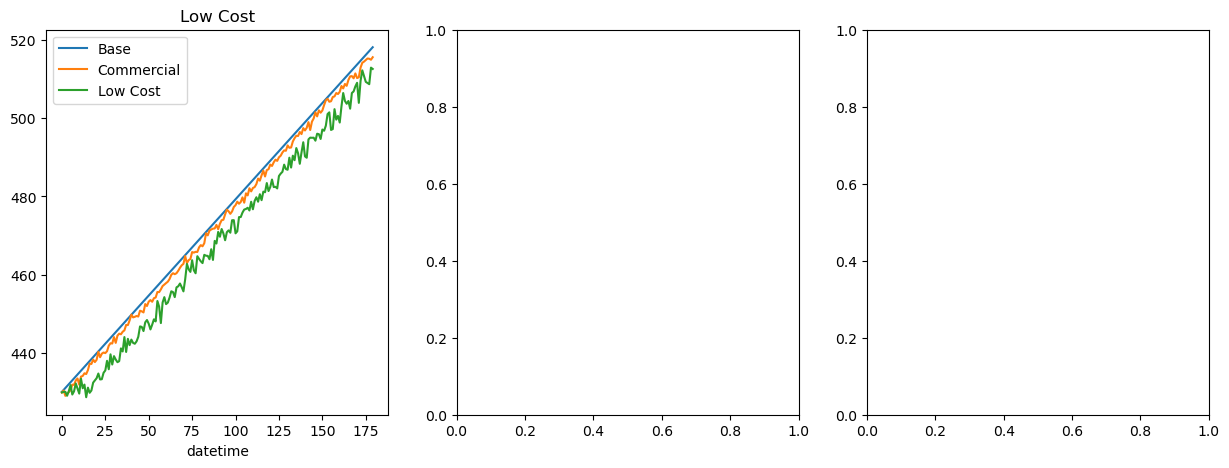

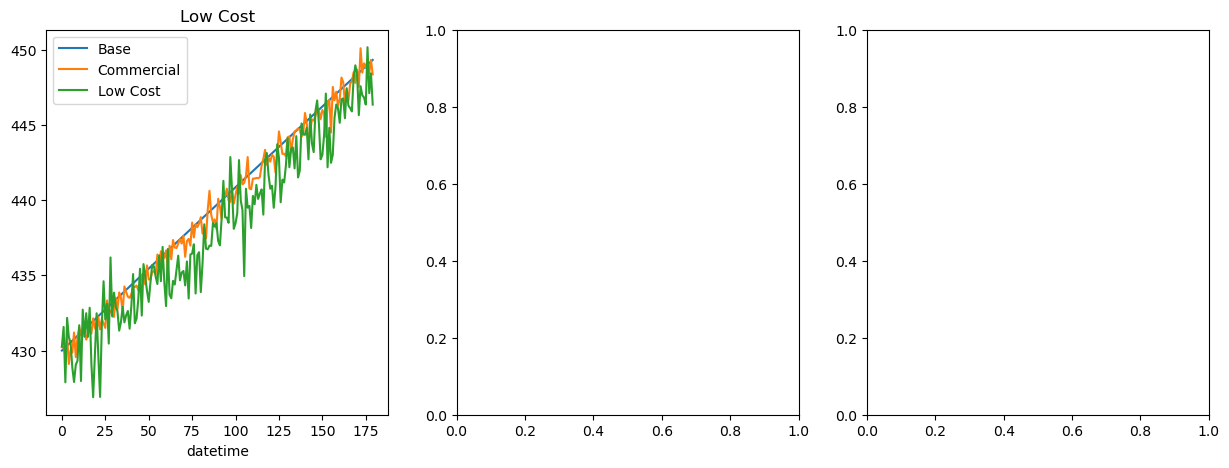

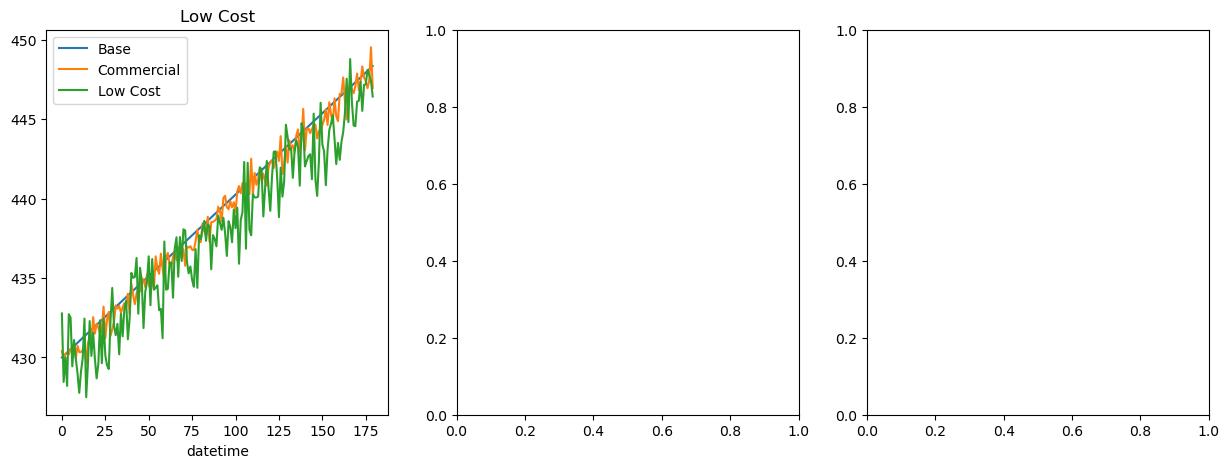

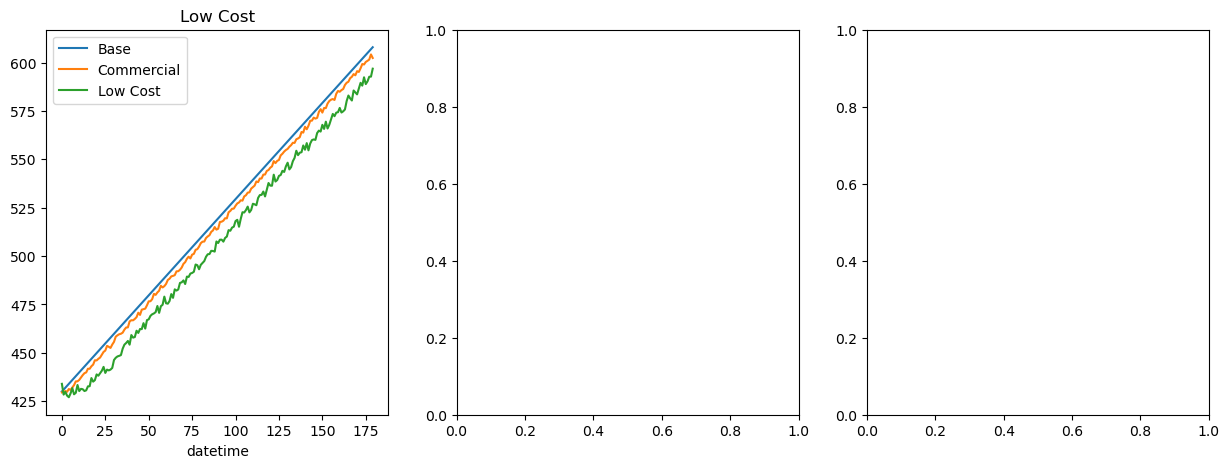

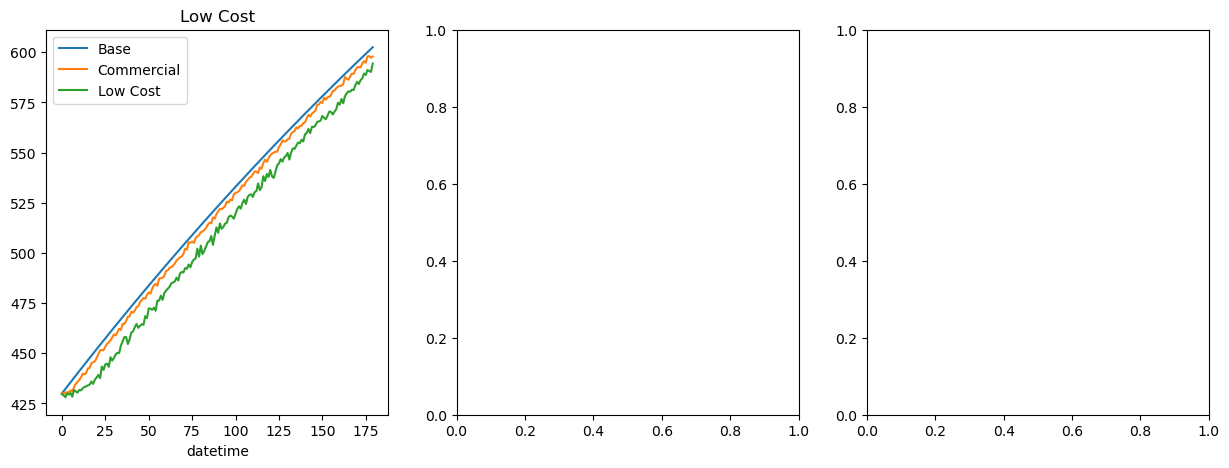

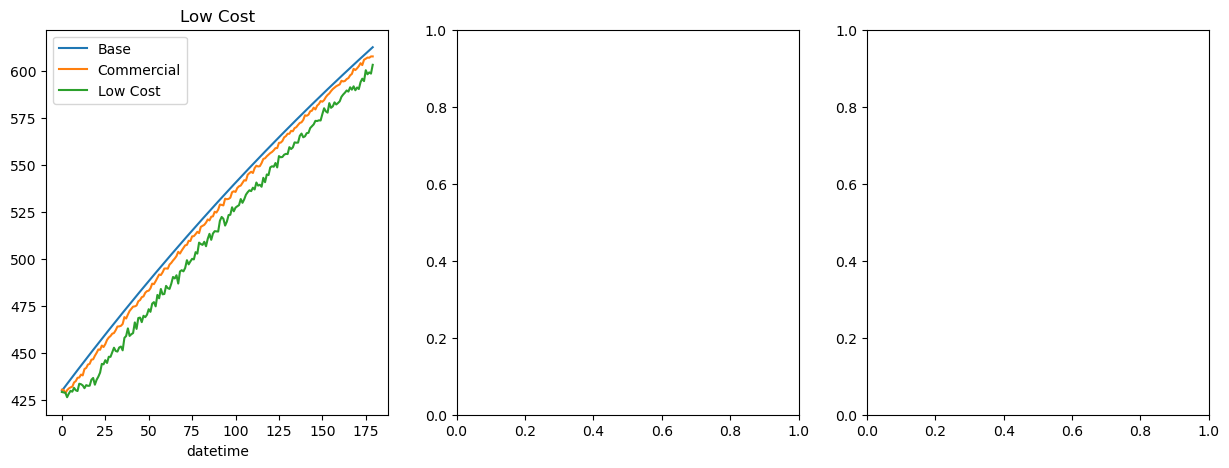

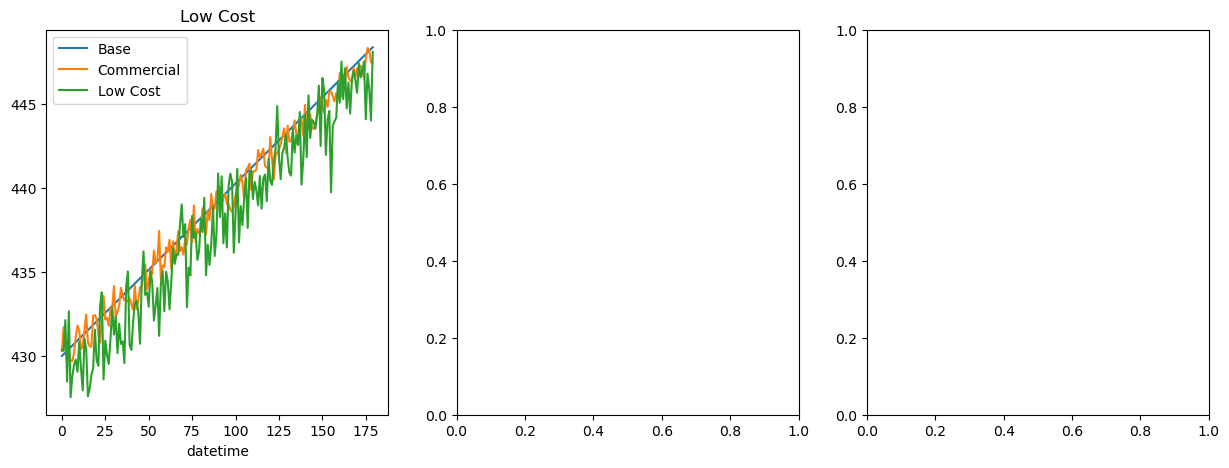

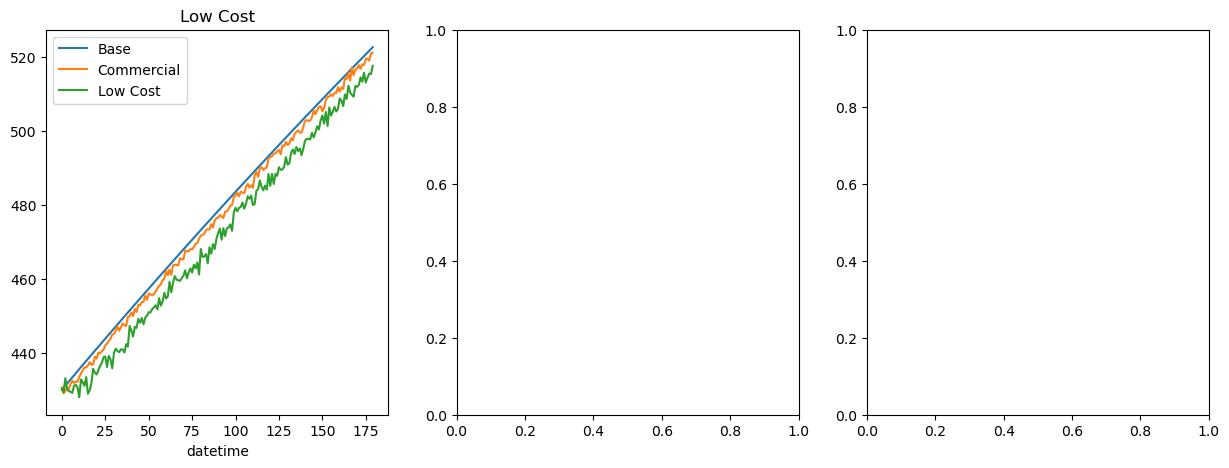

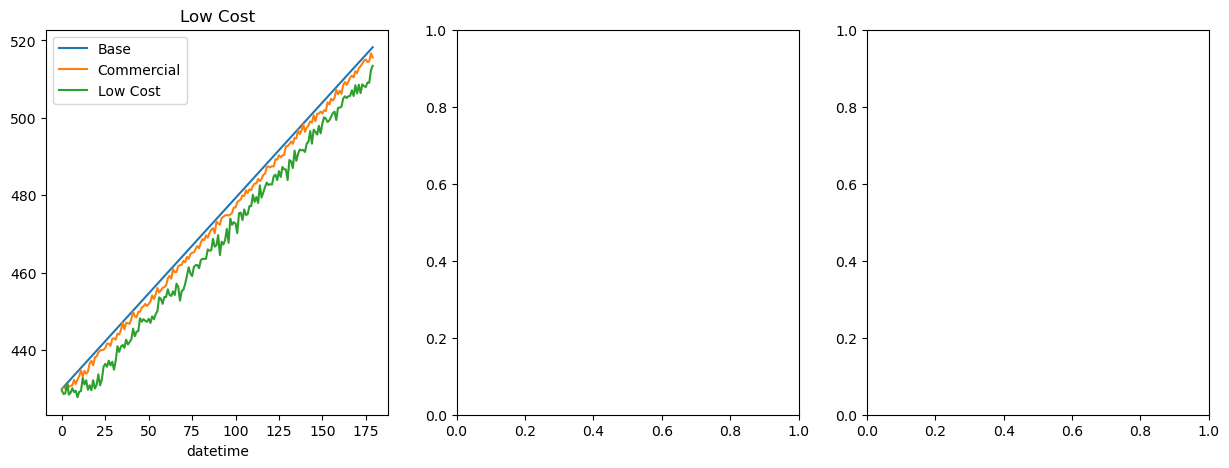

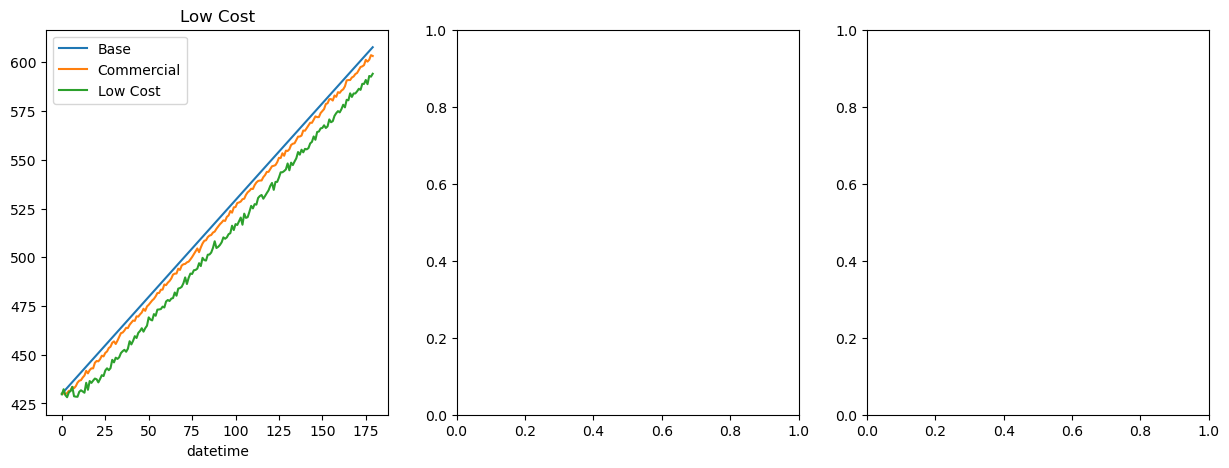

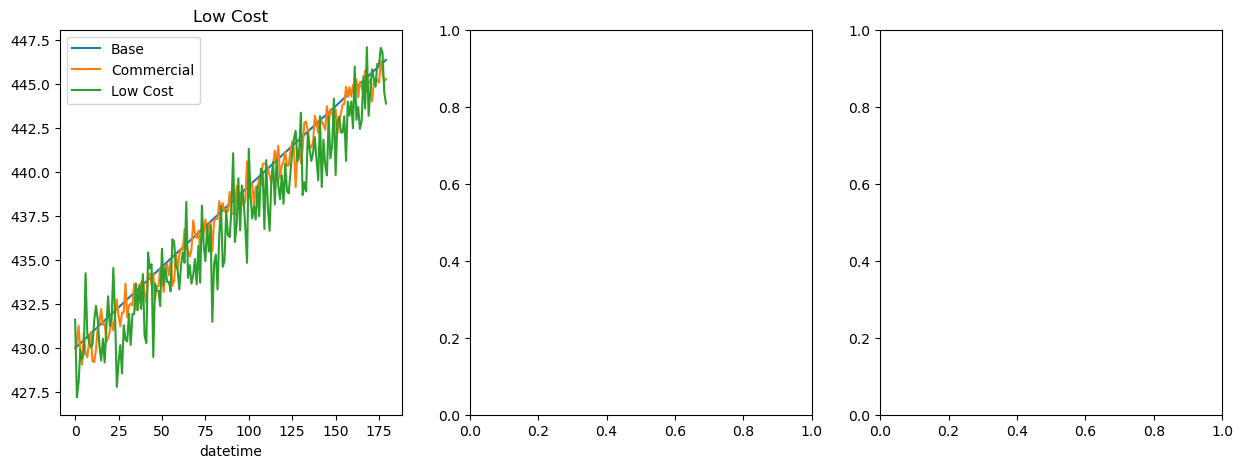

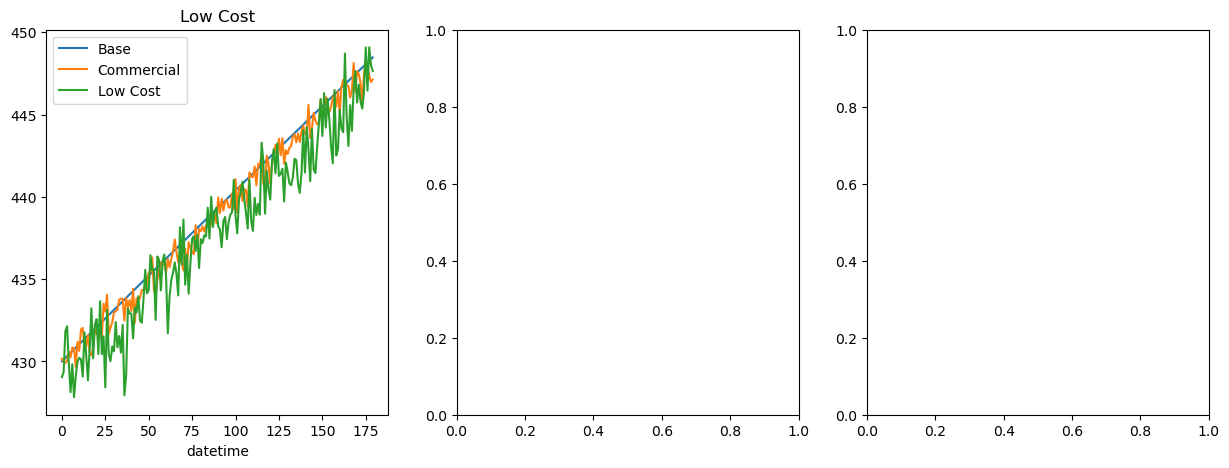

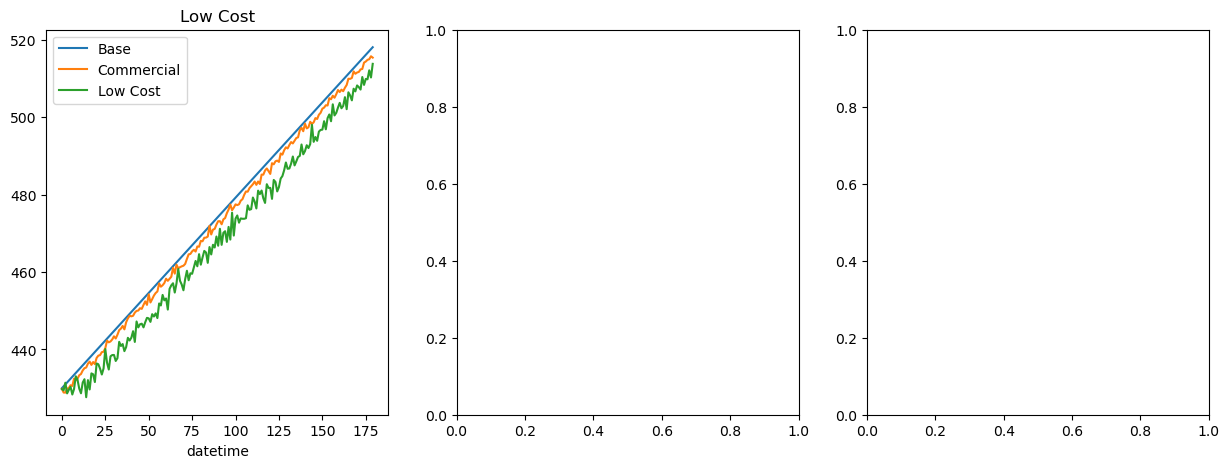

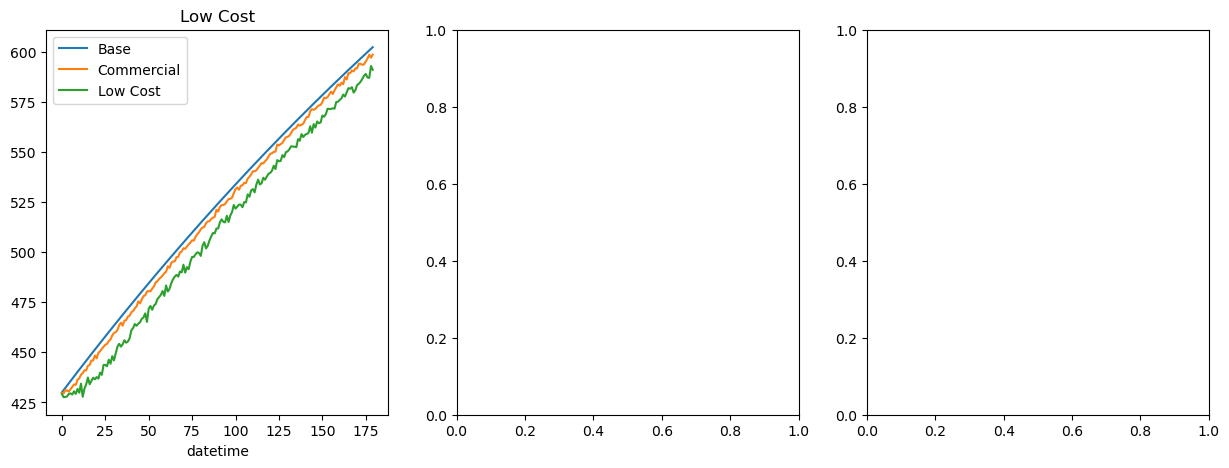

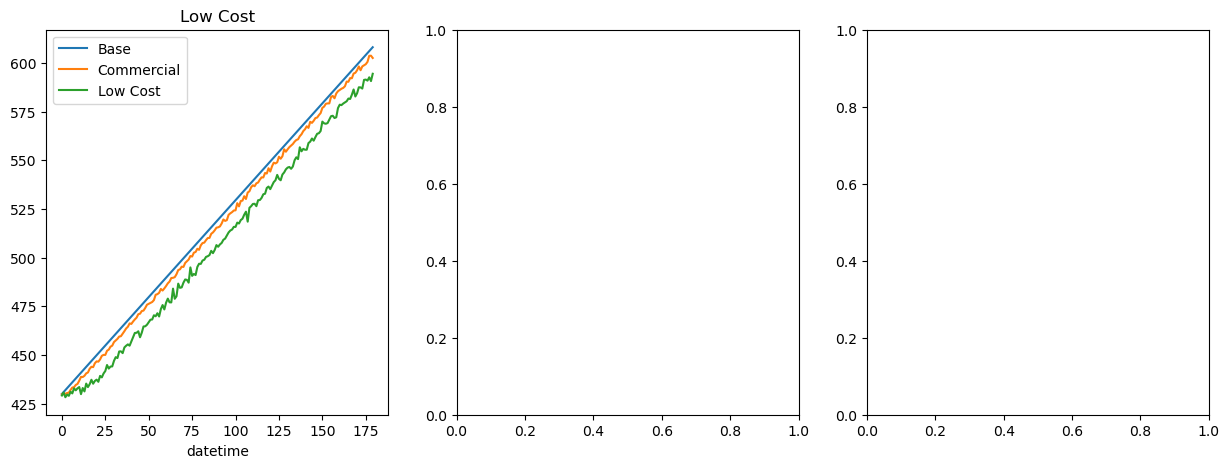

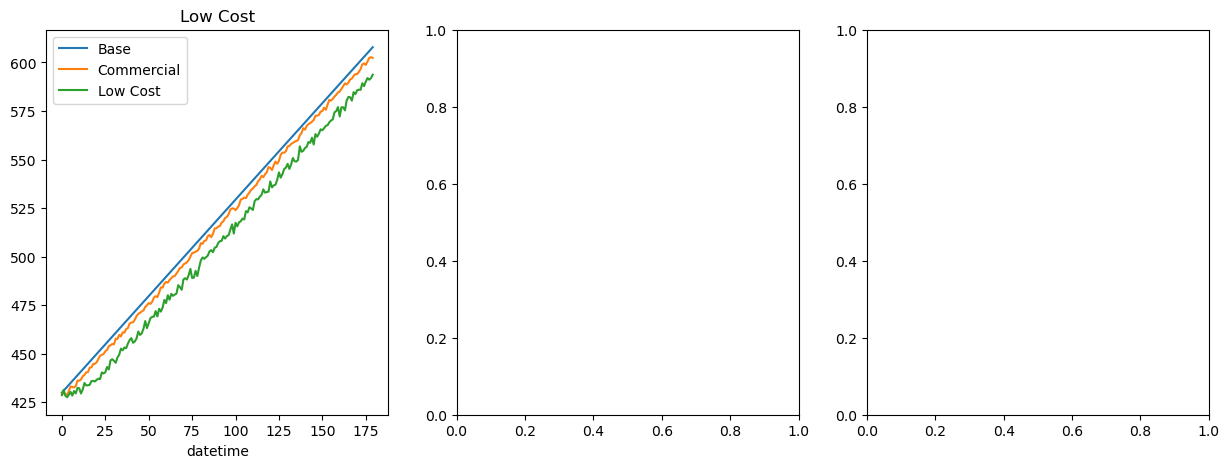

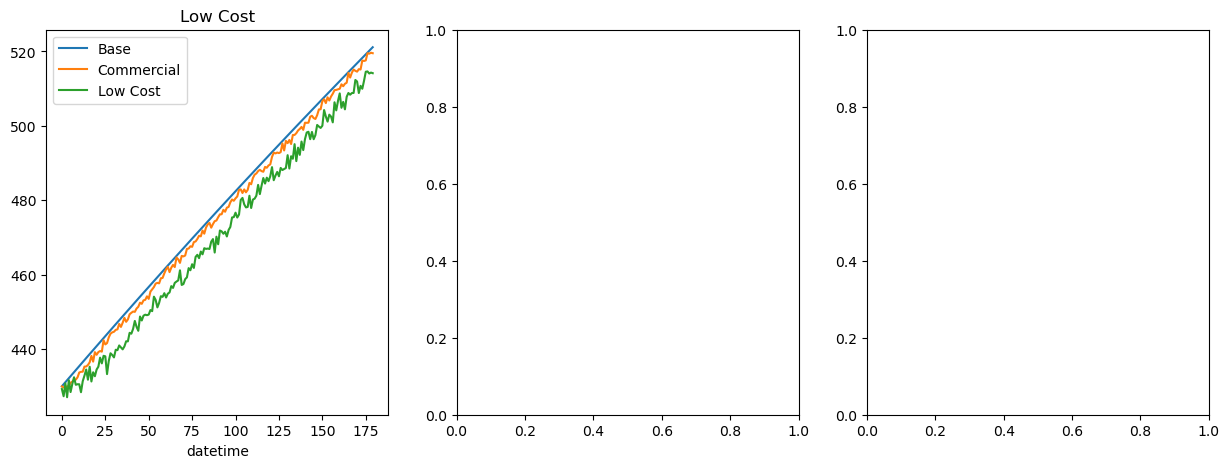

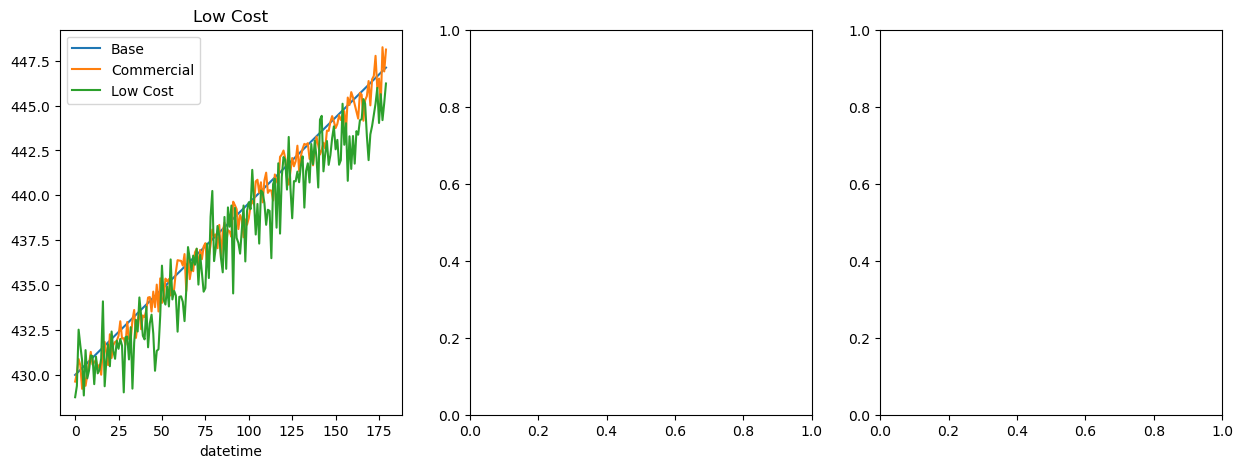

In [84]:
for i in df_base['id'].unique():
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    df_base[df_base['id'] == i].plot(x='datetime', y='k30_co2', ax=ax[0], label='Base')
    df_commercial[df_commercial['id'] == i].plot(x='datetime', y='k30_co2', ax=ax[0], label='Commercial')
    df_lowcost[df_lowcost['id'] == i].plot(x='datetime', y='k30_co2', ax=ax[0], label='Low Cost')
    ax[0].set_title('Base')
    ax[0].set_title('Commercial')
    ax[0].set_title('Low Cost')
    plt.show()